## Downloading the Dataset
https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/code

We will use the opendatasets library to download the dataset from the above kaggle link.

In [1]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

In [2]:
ds_url = 'https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/code'

In [3]:
od.download(ds_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ebadsayed
Your Kaggle Key: ··········


100%|██████████| 190M/190M [00:01<00:00, 130MB/s]


In [4]:
data_dir = './traffic-sign-dataset-classification/traffic_Data/DATA'
test_dir = './traffic-sign-dataset-classification/traffic_Data/TEST'
labels = './traffic-sign-dataset-classification'

Let's see how many classes does this dataset have.

In [5]:
import os
os.listdir(data_dir)

['21',
 '27',
 '12',
 '56',
 '42',
 '49',
 '5',
 '51',
 '0',
 '2',
 '34',
 '10',
 '23',
 '39',
 '37',
 '19',
 '53',
 '31',
 '16',
 '52',
 '55',
 '4',
 '11',
 '26',
 '9',
 '14',
 '33',
 '41',
 '45',
 '32',
 '57',
 '46',
 '40',
 '48',
 '54',
 '22',
 '44',
 '13',
 '35',
 '7',
 '25',
 '47',
 '8',
 '36',
 '17',
 '1',
 '24',
 '30',
 '43',
 '3',
 '28',
 '50',
 '38',
 '29',
 '18',
 '6',
 '20',
 '15']

Let us also see how many members do each class have

In [6]:
for cls in os.listdir(data_dir):
  print(cls, ':', len(os.listdir(data_dir + '/' + cls)))

21 : 12
27 : 28
12 : 96
56 : 110
42 : 32
49 : 42
5 : 194
51 : 8
0 : 118
2 : 80
34 : 26
10 : 70
23 : 14
39 : 34
37 : 58
19 : 4
53 : 2
31 : 42
16 : 142
52 : 36
55 : 162
4 : 98
11 : 138
26 : 126
9 : 2
14 : 128
33 : 4
41 : 18
45 : 24
32 : 14
57 : 6
46 : 18
40 : 32
48 : 10
54 : 324
22 : 18
44 : 30
13 : 36
35 : 156
7 : 152
25 : 2
47 : 12
8 : 8
36 : 40
17 : 130
1 : 40
24 : 100
30 : 150
43 : 82
3 : 260
28 : 446
50 : 56
38 : 30
29 : 44
18 : 8
6 : 78
20 : 18
15 : 22


##Importing Dataset into PyTorch
Using the `ImageFolder` class from `torchvision`.

In [7]:
from torchvision.datasets import ImageFolder
ds = ImageFolder(data_dir)

In [8]:
len(ds)

4170

In [9]:
ds[0]

(<PIL.Image.Image image mode=RGB size=134x128 at 0x7F2F3859CD90>, 0)

In [10]:
ds.classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '6',
 '7',
 '8',
 '9']

Displaying the image using matplotlib

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

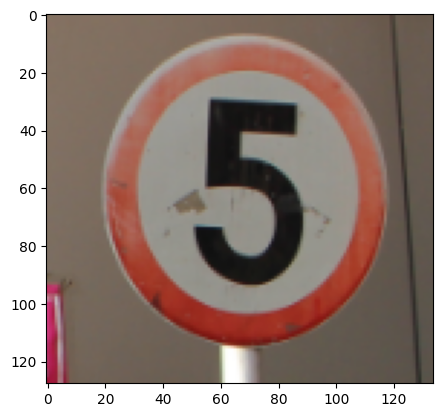

In [12]:
img, label = ds[0]
plt.imshow(img)

Now we will convert the images into tensor with some additional operations.

In [13]:
import torchvision.transforms as tt
ds = ImageFolder(data_dir, tt.Compose([tt.Resize(64),
                                      tt.RandomCrop(64),
                                      tt.ToTensor()]))

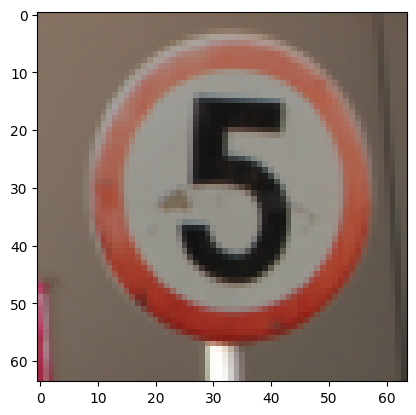

In [14]:
img, label = ds[0]
plt.imshow(img.permute((1,2,0)))

## Spliting the dataset into Training Set and Validation Set
Since there's no predefined validation set, we must manually split the 4317 images into training and validation datasets. We will set aside 0.1% of `randomly chosen` images for validation. We can do this using the `random_spilt` method from PyTorch.

In [15]:
val_pct = 0.1                     # Validation Percentage
val_size = int(val_pct * len(ds)) # Validation Size
train_size = len(ds) - val_size
train_size, val_size

(3753, 417)

In [16]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(ds, [train_size, val_size])
len(train_ds), len(val_ds)

(3753, 417)

It's essential to choose a `random sample` for creating a validation set. Training data is often `sorted` by the target labels, i.e., images of 0s, followed by 1s, followed by 2s, etc. If we create a validation set using the last 20% of images, it would only consist of 8s and 9s. In contrast, the training set would contain no 8s or 9s. Such a training-validation would make it impossible to train a useful model.

`Data Loader` can be used to iterate through the data, manage batches, transform the data, etc. It helps to simplify your machine learning pipeline. We will create the data loaders for training and validation set to help us load the data in batches.

In [17]:
batch_size = 128

from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds,
                      batch_size,
                      shuffle=True,
                      num_workers=4,
                      pin_memory=True)

val_dl = DataLoader(val_ds,
                      batch_size,
                      shuffle=True,
                      num_workers=4,
                      pin_memory=True)

test_dl = DataLoader(test_dir,
                      batch_size,
                      shuffle=True,
                      num_workers=4,
                      pin_memory=True)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [18]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1,2,0))
    break

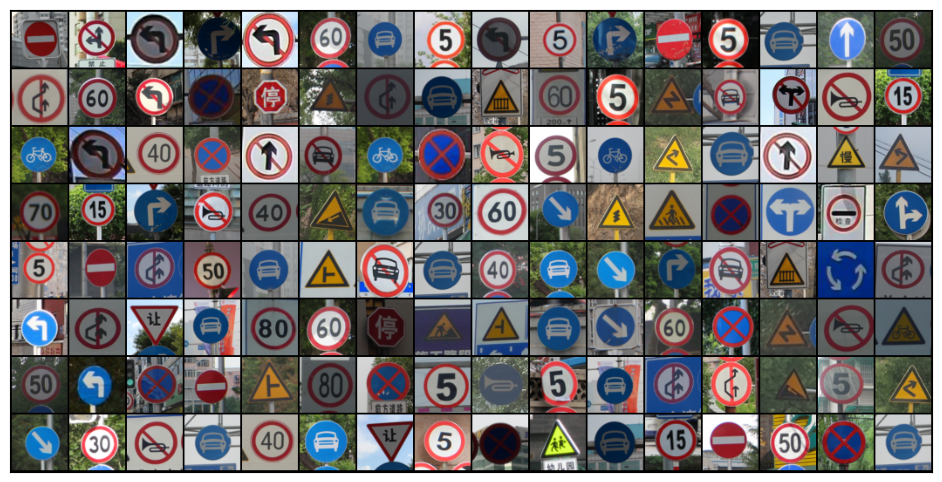

In [19]:
show_batch(train_dl)

The above image is a `batch` of the `training dataloader`.

# GPU Utilities
To check whether we have a GPU or not. GPU helps to run our code much faster mainly while training the data on a huge dataset.

In [20]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [21]:
torch.cuda.is_available()

True

In [22]:
device = get_default_device()
device

device(type='cuda')

In [23]:
img, label = ds[0]
img.device

device(type='cpu')

In [24]:
img_gpu = to_device(img, device)
img_gpu.device

device(type='cuda', index=0)

In [25]:
# Wrapping the training dataloader with the device
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

## Model & Training Utilities

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):    
      # Calculate Loss for a batch of Training data
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):       
      # Calculate Loss & Accuracy for a batch of Validation data
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [27]:
@torch.no_grad()
def evaluate(model, val_loader):
  # Evaluates the model's Performance on the Validation dataset
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

## Model

In [28]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input : 128 x 3 x 64 x 64
        
        self.conv1 = conv_block(in_channels, 64) # 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), # 128 x 128 x 32 x 32
                                  conv_block(128, 128)) # 128 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True) # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 128 x 512 x 8 x 8
        self.res2 = nn.Sequential(conv_block(512, 512), # 128 x 512 x 8 x 8
                                  conv_block(512, 512)) # 128 x 512 x 8 x 8
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1
                                        nn.Flatten(), # 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [29]:
model = to_device(ResNet9(3,len(ds.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [30]:
model.conv1[0].weight.device

device(type='cuda', index=0)

First we will try to pass one batch of input tensor through the model.

In [31]:
for batch in train_dl:
  images, labels = batch
  print('images.shape', images.shape)
  print('images.device', images.device)
  preds = model(images)
  print('preds.shape', preds.shape)
  break

images.shape torch.Size([128, 3, 64, 64])
images.device cuda:0
preds.shape torch.Size([128, 58])


## Training the Model

In [32]:
history = [evaluate(model, val_dl)]
history

[{'val_loss': 4.052359580993652, 'val_acc': 0.033203125}]

In [44]:
history += fit(5, 0.001, model, train_dl, val_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.5417, val_loss: 0.3569, val_acc: 0.9009
Epoch [1], train_loss: 0.2387, val_loss: 0.1319, val_acc: 0.9690
Epoch [2], train_loss: 0.0867, val_loss: 0.0581, val_acc: 0.9863
Epoch [3], train_loss: 0.0517, val_loss: 0.0657, val_acc: 0.9844
Epoch [4], train_loss: 0.0341, val_loss: 0.0405, val_acc: 0.9866


In [45]:
history += fit(5, 0.0001, model, train_dl, val_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.0067, val_loss: 0.0131, val_acc: 0.9941
Epoch [1], train_loss: 0.0032, val_loss: 0.0133, val_acc: 0.9961
Epoch [2], train_loss: 0.0019, val_loss: 0.0120, val_acc: 0.9922
Epoch [3], train_loss: 0.0010, val_loss: 0.0241, val_acc: 0.9905
Epoch [4], train_loss: 0.0013, val_loss: 0.0077, val_acc: 0.9961


We get the accuracy from 90% to 98%, then from 98% to 99%. If one epoch is taking more than 2-3 mins then change the batch_size, use small datasets, etc and try to reduce the runtime.

In [46]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

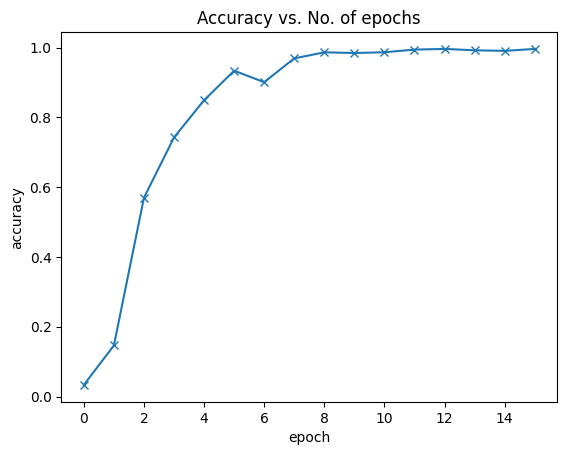

In [47]:
plot_accuracies(history)

In [48]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

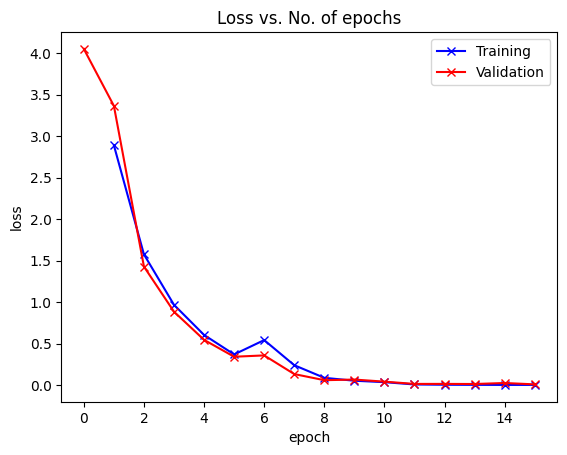

In [49]:
plot_losses(history)

We have plotted the graphs of `accuracy` vs `no. of epochs` and `loss` vs `no. of epochs`. Overfitting occurs when the `Validation Loss` starts to increase and the `Training Loss` starts to decrease.

In [50]:
!pip install jovian --upgrade --quiet
import jovian

In [51]:
jovian.reset()
jovian.log_dataset(image_size=64,
                   arch='ResNet9',
                   epoch=[5,5,5],
                   lrs=[0.001, 0.0001, 0.0001],
                   opt=['Adam', 'Adam', 'SGD'])
jovian.log_metrics(train_loss=history[-1]['train_loss'],
                   val_loss=history[-1]['val_loss'],
                   val_acc=history[-1]['val_acc'])

[jovian] Dataset logged.
[jovian] Metrics logged.


In [52]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Testing with Individual Images

In [79]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [80]:
def getClassName(pred):
    classNo = int(pred)
    if classNo == 0 : return 'Speed Limit 5 km/hr'
    elif classNo == 1 : return 'Speed Limit 30 km/hr'
    elif classNo == 2 : return 'Speed Limit 50 km/hr'
    elif classNo == 3 : return 'Speed Limit 40 km/hr'
    elif classNo == 4 : return 'Speed Limit 50 km/hr'
    elif classNo == 5 : return 'Speed Limit 60 km/hr'
    elif classNo == 6 : return 'Speed Limit 70 km/hr'
    elif classNo == 7 : return 'Speed Limit 80 km/hr'
    elif classNo == 8 : return "Don't Go straight or left"
    elif classNo == 9 : return "Don't Go straight or Right"
    elif classNo == 10 : return "Don't go straight"
    elif classNo == 11 : return 'Left turn prohibited'
    elif classNo == 12 : return 'Left & Right turn prohibited'
    elif classNo == 13 : return 'Right turn prohibited'
    elif classNo == 14 : return 'Overtaking Prohibited'
    elif classNo == 15 : return 'U-turn Prohibited'
    elif classNo == 16 : return 'No Car'
    elif classNo == 17 : return 'No Horn'
    elif classNo == 18 : return 'End of max speed limit 40 km/hr'
    elif classNo == 19 : return 'End of max speed limit 50 km/hr'
    elif classNo == 20 : return 'Go straight or right turn'
    elif classNo == 21 : return 'Go straight'
    elif classNo == 22 : return 'Go left'
    elif classNo == 23 : return 'Go left or right'
    elif classNo == 24 : return 'Go right'
    elif classNo == 25 : return 'Keep left'
    elif classNo == 26 : return 'Keep right' 
    elif classNo == 27 : return 'Roundabout mandatory'
    elif classNo == 28 : return 'Watch out for Cars'
    elif classNo == 29 : return 'Horn'
    elif classNo == 30 : return 'Bicycles Crossing'
    elif classNo == 31 : return 'U-turn'
    elif classNo == 32 : return 'Road Divider'
    elif classNo == 33 : return 'Traffic Signals'
    elif classNo == 34 : return 'Danger Ahead'
    elif classNo == 35 : return 'Zebra Crossing'
    elif classNo == 36 : return 'Bicycles Crossing'
    elif classNo == 37 : return 'Children Crossing'
    elif classNo == 38 : return 'Dangerous curve to the left'
    elif classNo == 39 : return 'Dangerous curve to the right'
    elif classNo == 40 : return 'Warning steep slope towards left'
    elif classNo == 41 : return 'Warning steep slope towards right'
    elif classNo == 42 : return 'Chinese'
    elif classNo == 43 : return 'Go right or straight'
    elif classNo == 44 : return 'Go left or straight'
    elif classNo == 45 : return 'House Ahead'
    elif classNo == 46 : return 'ZigZag Curve'
    elif classNo == 47 : return 'Train Crossing'
    elif classNo == 48 : return 'Under Construction'
    elif classNo == 49 : return 'ZigZag Road Ahead'
    elif classNo == 50 : return 'Fences'
    elif classNo == 51 : return 'Heavy Vehicle Accidents'
    elif classNo == 52 : return 'Chinese'
    elif classNo == 53 : return 'Give Way'
    elif classNo == 54 : return 'No Stopping'
    elif classNo == 55 : return 'No Entry'
    elif classNo == 56 : return 'Chinese'
    elif classNo == 57 : return 'Chinese'

In [81]:
def predictions(num):
  img, label = val_ds[num]
  plt.imshow(img.permute(1,2,0))
  pred = predict_image(img, model, ds.classes)
  print('Target :', ds.classes[label])
  print('Prediction :', getClassName(pred))

Target : 3
Prediction : Speed Limit 40 km/hr


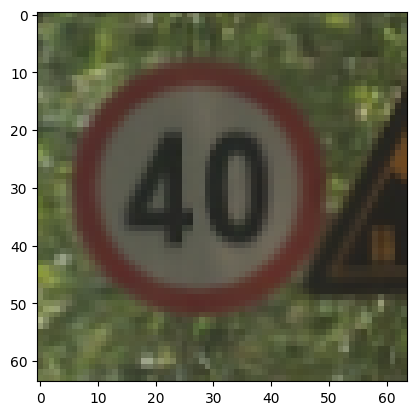

In [82]:
predictions(10)

Target : 23
Prediction : Go left or right


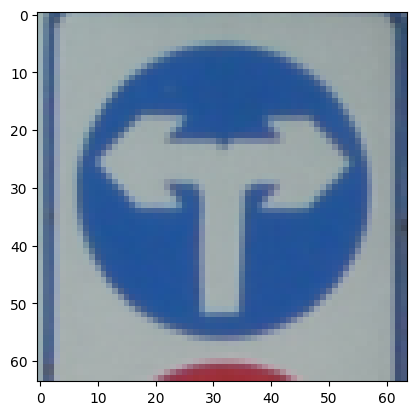

In [84]:
predictions(50)

Target : 30
Prediction : Bicycles Crossing


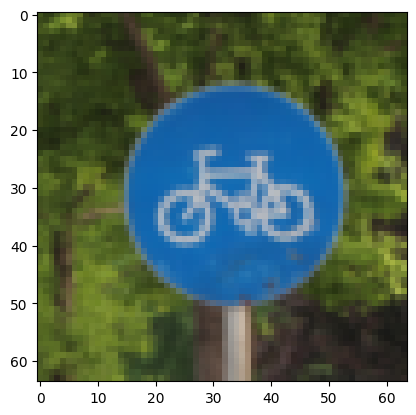

In [85]:
predictions(0)

Target : 34
Prediction : Danger Ahead


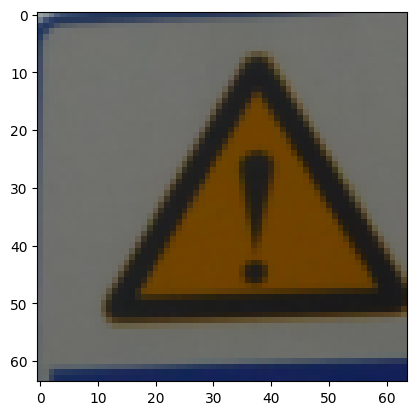

In [86]:
predictions(20)

In [87]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
